1. Привести все текстовые данные к общему формату. (если это возможно). 

In [41]:
import pandas as pd

# Загрузка датасета
df = pd.read_csv("dataset/LitovkinTest.csv", sep=",", encoding="utf-8")

# Функция для приведения текста к общему формату
def normalize_text(text):
    if isinstance(text, str):  # Проверка, является ли значение строкой
        return text.strip().lower()  # Удаление пробелов и приведение к нижнему регистру
    return text

# Применение функции ко всем строковым столбцам
df_normalized = df.applymap(normalize_text)

# Вывод первых 5 строк нормализованного датасета
df_normalized.head()

C:\Users\mset6\AppData\Local\Temp\ipykernel_12180\2667478410.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalized = df.applymap(normalize_text)


,Отметка времени,"Когда я поступал(а) в университет я выбрал(а) профессию программиста, потому что","Когда я поступал(а) в университет я выбрал(а) профессию программиста, потому что:","Я считал(а), что программирование будет даваться мне","Я уже знал(а)-умел(а) программировать, используя (языки и средства программирования):","Сейчас, программирование дается мне:",Unnamed: 6,Гуманитарные дисциплины даются мне:,Естественно-научные дисциплины даются мне:,"Дисциплины, связанные с ""железом"", даются мне:",...,"Я бы, скорее, предпочел(ла) учиться программированию у преподавателя, который:",После обучения в университете я поменял(а) представление о профессии программиста следующим образом:,Я бы хотел(а) изменить в своем обучении программированию это:,Я бы хотел(а) изменить в изучении других дисциплин это:,Компенсацией за сложность обучения программированию для меня является:,"Я, по-прежнему, хочу стать программистом:","Все надоело, хочу в армию/замуж/(что-то еще), а там посмотрим:",Хотели сообщить что-то еще?,Курс,Направление
0,02.11.2022 12:53:50,NaN,"меня увлекает кодирование, так как нравится ре...",средне,"да, python",средне,NaN,легко,легко,легко,...,"много и доступно объясняет, но и много спраши...",-,-,-,-,да,"конечно, нет",NaN,1,программная инженерия
1,02.11.2022 12:57:26,NaN,это интересное и актуальное направление,средне,-,легко,NaN,средне,средне,легко,...,"много и доступно объясняет, но и много спраши...",никак,не знаю,убрать гуманитарные дисциплины,полученные навыки,да,"конечно, нет",NaN,1,программная инженерия
2,02.11.2022 12:57:31,NaN,данное направление показалось мне наиболее инт...,средне,phyton,средне,NaN,средне,средне,средне,...,"много и доступно объясняет, но и много спраши...",-,больше программирования),-,отдых,да,"конечно, нет",-,1,программная инженерия
3,02.11.2022 12:59:31,NaN,"технические специальности - единственное, что ...",средне,"python, #c",средне,NaN,средне,средне,средне,...,"много и доступно объясняет, но и много спраши...",пока не поменяла,"больше практики, больше код-ревью",меньше разговоров о важном,well-paid job,да,"конечно, нет",с вас хватит.,1,программная инженерия
4,02.11.2022 13:10:09,NaN,мне было интересно научиться программированию....,средне,pascal,средне,NaN,средне,средне,средне,...,"много и доступно объясняет, но и много спраши...",я не поменяла представление,больше практиковаться самостоятельно,ничего,"уверенность, что я смогу найти достойную работ...",да,"конечно, нет",NaN,1,программная инженерия


2. В параметрах, где указываются часы - разделить на диапазоны. (пример 10-20 часов) 

In [42]:
# Шаг 1: Отфильтровать строки с числовыми значениями в целевых столбцах
numeric_columns = [
    "Я трачу на учебу такое кол-во часов в неделю:",
    "Я трачу на учебу такой % моего времени за неделю:",
    "Я отдыхаю такое кол-во часов в неделю:"
]

def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Фильтруем строки
df_filtered = df_normalized[df_normalized[numeric_columns].applymap(is_numeric).all(axis=1)]

# Преобразуем выбранные столбцы в числовой формат
for col in numeric_columns:
    df_filtered[col] = df_filtered[col].astype(float)

# Шаг 2: Преобразовать текстовые оценки в числовые
rating_mapping = {"легко": 1, "средне": 0.5, "сложно": 0}

rating_columns = [
    "Сейчас, программирование дается мне:",
    "Гуманитарные дисциплины даются мне:",
    "Естественно-научные дисциплины даются мне:",
    "Физкультура дается мне:"
]

for col in rating_columns:
    df_filtered[col] = df_filtered[col].map(rating_mapping)

# Шаг 3: Найти корреляции
all_columns = numeric_columns + rating_columns
correlation_matrix = df_filtered[all_columns].corr(method="pearson")

# Вывод корреляционной матрицы
print("Корреляционная матрица:")
correlation_matrix



Корреляционная матрица:


C:\Users\mset6\AppData\Local\Temp\ipykernel_12180\4283738673.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filtered = df_normalized[df_normalized[numeric_columns].applymap(is_numeric).all(axis=1)]
C:\Users\mset6\AppData\Local\Temp\ipykernel_12180\4283738673.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered[col].astype(float)
C:\Users\mset6\AppData\Local\Temp\ipykernel_12180\4283738673.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Я трачу на учебу такое кол-во часов в неделю:,Я трачу на учебу такой % моего времени за неделю:,Я отдыхаю такое кол-во часов в неделю:,"Сейчас, программирование дается мне:",Гуманитарные дисциплины даются мне:,Естественно-научные дисциплины даются мне:,Физкультура дается мне:
Я трачу на учебу такое кол-во часов в неделю:,1.000000,0.984821,0.970628,-0.023461,-0.264973,0.004549,0.000425
Я трачу на учебу такой % моего времени за неделю:,0.984821,1.000000,0.953545,-0.018153,-0.278118,-0.036069,-0.005932
Я отдыхаю такое кол-во часов в неделю:,0.970628,0.953545,1.000000,-0.009376,-0.271359,0.050497,-0.050692
"Сейчас, программирование дается мне:",-0.023461,-0.018153,-0.009376,1.000000,-0.105072,-0.096077,-0.282487
Гуманитарные дисциплины даются мне:,-0.264973,-0.278118,-0.271359,-0.105072,1.000000,0.060167,0.228734
Естественно-научные дисциплины даются мне:,0.004549,-0.036069,0.050497,-0.096077,0.060167,1.000000,-0.209544
Физкультура дается мне:,0.000425,-0.005932,-0.050692,-0.282487,0.228734,-0.209544,1.000000


C:\Users\mset6\AppData\Local\Temp\ipykernel_12180\2780935778.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=programming_difficulty.index, y=programming_difficulty.values, palette="coolwarm")


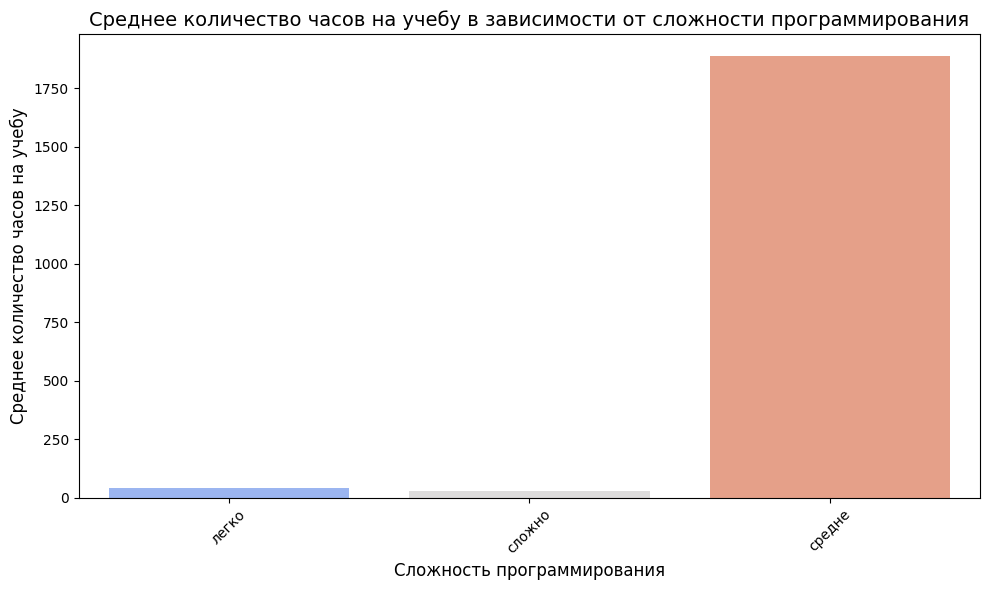

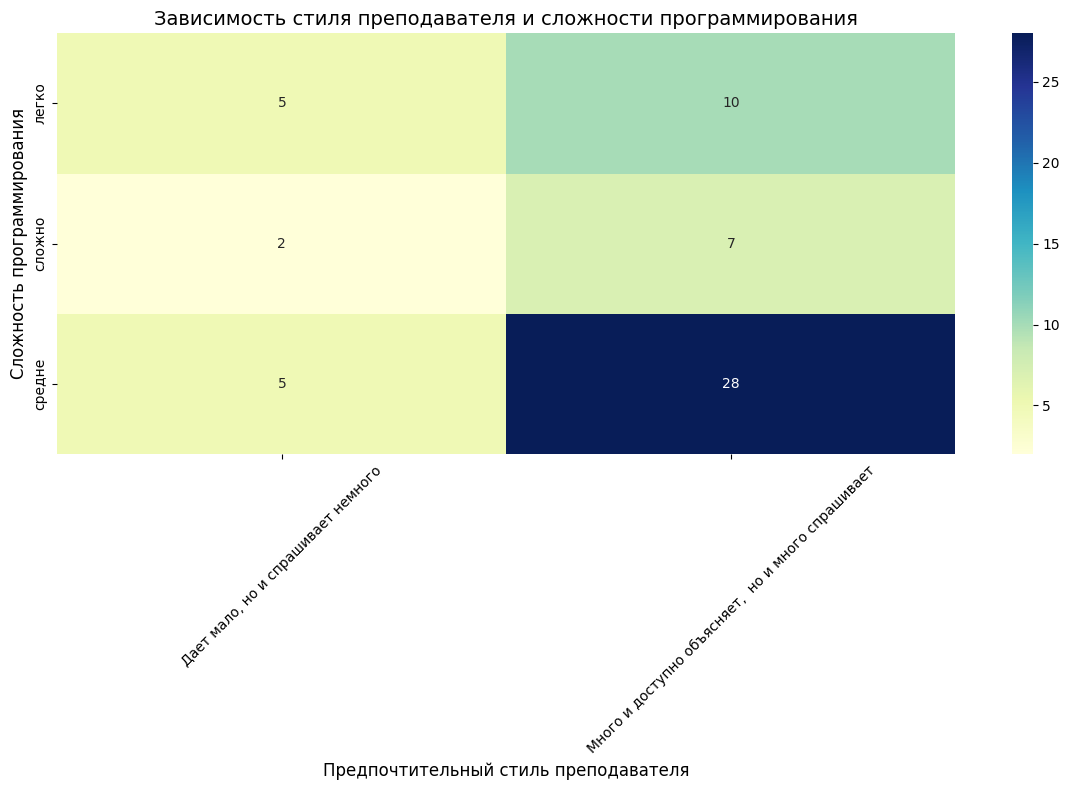

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
file_path = "dataset/LitovkinTest.csv"
data = pd.read_csv(file_path)

# Очистка данных
data.columns = data.columns.str.strip()  # Удаляем лишние пробелы из названий столбцов
data.dropna(how='all', axis=1, inplace=True)  # Удаляем пустые столбцы

# Приведение данных к числовому типу (замена некорректных значений на NaN)
data['Я трачу на учебу такое кол-во часов в неделю:'] = pd.to_numeric(
    data['Я трачу на учебу такое кол-во часов в неделю:'], errors='coerce'
)

# Удаление строк с отсутствующими значениями в целевых столбцах
data.dropna(subset=['Сейчас, программирование дается мне:', 'Я трачу на учебу такое кол-во часов в неделю:'], inplace=True)

# Пример анализа: зависимость сложности программирования и часов, потраченных на учебу
data['Сейчас, программирование дается мне:'] = data['Сейчас, программирование дается мне:'].str.strip().str.lower()
programming_difficulty = data.groupby('Сейчас, программирование дается мне:')['Я трачу на учебу такое кол-во часов в неделю:'].mean()

# Построение графика зависимости
plt.figure(figsize=(10, 6))
sns.barplot(x=programming_difficulty.index, y=programming_difficulty.values, palette="coolwarm")
plt.title('Среднее количество часов на учебу в зависимости от сложности программирования', fontsize=14)
plt.xlabel('Сложность программирования', fontsize=12)
plt.ylabel('Среднее количество часов на учебу', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Сохранение графика
plt.show()

# Пример анализа: предпочитаемый преподавательский стиль и успеваемость
teacher_preference = data['Я бы, скорее, предпочел(ла) учиться  программированию у преподавателя, который:']
difficulty = data['Сейчас, программирование дается мне:']

# Создание сводной таблицы
pivot = pd.crosstab(difficulty, teacher_preference)

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Зависимость стиля преподавателя и сложности программирования', fontsize=14)
plt.xlabel('Предпочтительный стиль преподавателя', fontsize=12)
plt.ylabel('Сложность программирования', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Сохранение графика
plt.show()
